In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./files/cleaned_data.csv" , sep = "," , encoding = 'utf-8')

In [3]:
df.head()

,Unnamed: 0,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,0,0.056860,0.083668,0.111111,0.002273,0.162020,0.652819,2,0.000602,4.0,...,0,0,0,0,0,0,0,1,0,0
1,2,0.000000,0.083668,0.111111,0.002273,0.162020,0.658754,2,0.000602,2.0,...,0,0,0,0,0,0,0,1,0,0
2,3,0.056860,0.083668,0.138889,0.001591,0.162020,0.661721,2,0.000602,1.0,...,0,0,0,0,0,0,0,1,0,0
3,6,0.056860,0.083668,0.111111,0.002500,0.162020,0.670623,2,0.000602,1.0,...,0,0,0,0,0,0,0,1,0,0
4,9,0.057404,0.192389,0.166667,0.000909,0.121012,0.792285,2,0.000229,6.0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
print(df.count(axis='columns'))

0        27
1        27
2        27
3        27
4        27
         ..
69835    27
69836    27
69837    27
69838    27
69839    27
Length: 69840, dtype: int64


Ilość kolumn wynosi 27 (lub 26, wyłączając pole ID).

In [5]:
from sklearn.decomposition import PCA

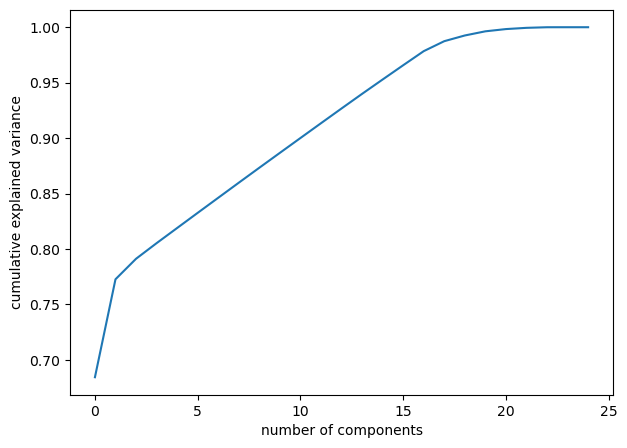

In [6]:
exclude_filter = ~df.columns.isin(['Unnamed: 0', 'Credit_Score'])
pca = PCA().fit(df.loc[:, exclude_filter])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.gcf().set_size_inches(7, 5)

In [7]:
# 95% zmienności, dane przekształcone
# w n components jeśli wpiszemy (0,1) to wybiera tyle zmiennych ile wyjaśnia % zmienności

pca = PCA(svd_solver='full', n_components=0.95)
principal_components = pca.fit_transform(df.loc[:, exclude_filter])
principal_df = pd.DataFrame(data=principal_components)
principal_df.head()

# dodać Y
y = df['Credit_Score']


In [8]:
# podział na zbiór testowy i uczący się
from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(principal_df, y, train_size=0.33)



In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(random_state= 100)
model.fit(x_train, y_train)
accuracy = model.score(x_test, y_test)
y_pred = model.predict(x_test)
report = classification_report(y_test, y_pred)

print('Dokładność modelu wynosi: ', accuracy)
print(report)



Dokładność modelu wynosi:  0.5579894428653859
              precision    recall  f1-score   support

           1       0.56      0.36      0.44     13801
           2       0.56      0.82      0.67     24839
           3       0.45      0.11      0.17      8153

    accuracy                           0.56     46793
   macro avg       0.53      0.43      0.42     46793
weighted avg       0.54      0.56      0.51     46793



AttributeError: 'function' object has no attribute 'shape'

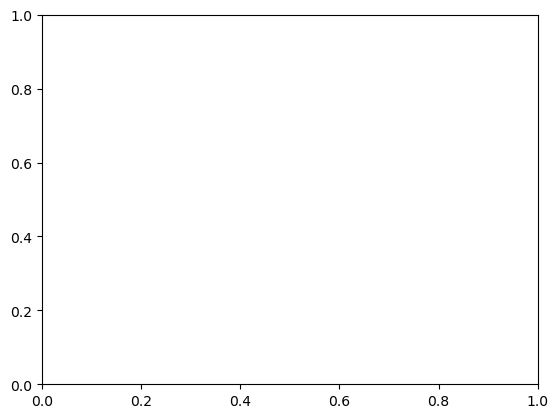

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix, display_labels=model.classes_).plot()

# cm = confusion_matrix(y_test, y_pred)

# sns.heatmap(cm, annot=True, cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()